In [86]:
from __future__ import division
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [88]:
# convert degrees to radians
def degree2radians(degree):
    #convert degrees to radians
    return degree*np.pi/180.
# get depth from filename
def getint(name):
    _, num = name.split('P_')
    num, _ = num.split('.')
    return int(num)
# maps the points of coords (lon, lat) to points onto the  sphere of radius radius
def mapping_map_to_sphere(lon, lat, radius=1):
    lon=np.array(lon, dtype=np.float64)
    lat=np.array(lat, dtype=np.float64)
    lon=degree2radians(lon)
    lat=degree2radians(lat)
    xs=radius*np.cos(lon)*np.cos(lat)
    ys=radius*np.sin(lon)*np.cos(lat)
    zs=radius*np.sin(lat)
    return xs, ys, zs
# Functions converting coastline/country polygons to lon/lat traces
def polygons_to_traces(poly_paths, N_poly, m):
    ''' 
    pos arg 1. (poly_paths): paths to polygons
    pos arg 2. (N_poly): number of polygon to convert
    '''
    # init. plotting list
    lons=[]
    lats=[]

    for i_poly in range(N_poly):
        poly_path = poly_paths[i_poly]
        
        # get the Basemap coordinates of each segment
        coords_cc = np.array(
            [(vertex[0],vertex[1]) 
             for (vertex,code) in poly_path.iter_segments(simplify=False)]
        )
        
        # convert coordinates to lon/lat by 'inverting' the Basemap projection
        lon_cc, lat_cc = m(coords_cc[:,0],coords_cc[:,1], inverse=True)
    
        
        lats.extend(lat_cc.tolist()+[None]) 
        lons.extend(lon_cc.tolist()+[None])
        
       
    return lons, lats
# Function generating coastline lon/lat 
def get_coastline_traces(m):
    poly_paths = m.drawcoastlines().get_paths() # coastline polygon paths
    N_poly = 91  # use only the 91st biggest coastlines (i.e. no rivers)
    cc_lons, cc_lats= polygons_to_traces(poly_paths, N_poly, m)
    return cc_lons, cc_lats
# Function generating country lon/lat 
def get_country_traces(m):
    poly_paths = m.drawcountries().get_paths() # country polygon paths
    N_poly = len(poly_paths)  # use all countries
    country_lons, country_lats= polygons_to_traces(poly_paths, N_poly, m)
    return country_lons, country_lats

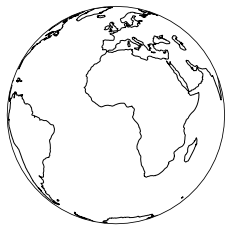

In [97]:
import cartopy.crs as ccrs
# ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic())
ax.coastlines()


In [106]:
import cartopy
ax = plt.axes(cartopy.feature.ShapelyFeature('sphere', ccrs.Orthographic()))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 432x288 with 0 Axes>

In [85]:



cos = np.cos
sin = np.sin
pi = np.pi
dot = np.dot

max_radius = 0

"Draw Earth as a globe at the origin"
Earth_radius = 6371 # km
global max_radius
max_radius = max(max_radius, Earth_radius)

# Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
coefs = (1, 1, 1)  

# Radii corresponding to the coefficients:
rx, ry, rz = [Earth_radius/np.sqrt(coef) for coef in coefs]

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:


import plotly.graph_objects as go
import numpy as np



fig = go.Figure(data=[go.Surface(x=rx * np.outer(np.cos(u), np.sin(v)),
                                   y=ry * np.outer(np.sin(u), np.sin(v)),
                                   z=rz * np.outer(np.ones_like(u), np.cos(v)),
                                                                  ),
                                   ],
                                   )

fig.show()


<ipython-input-110-c74a1ab156b9>:24: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



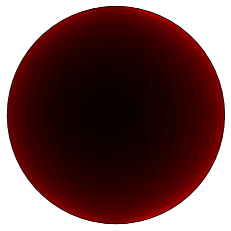

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs

# a grid for the longitudes and latitudes
lats = np.linspace(-90, 90, 50)
longs = np.linspace(-180, 180, 50)
lats, longs = np.meshgrid(lats, longs)

# some data
data = lats[1:] ** 2 + longs[1:] ** 2

fig = plt.figure()

# create a new axes with a cartopy.crs projection instance
ax = fig.add_subplot(1, 1, 1, projection=crs.Orthographic())

# plot the date
ax.pcolormesh(
    longs, lats, data,
    cmap='hot',
    transform=crs.PlateCarree(),  # this means that x, y are given as longitude and latitude in degrees
)
fig.tight_layout()
fig.savefig('cartopy.png', dpi=300)


In [119]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pyplot

cos = np.cos
sin = np.sin
pi = np.pi
dot = np.dot

fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d', aspect='auto')

max_radius = 0

def plotEarth():
    "Draw Earth as a globe at the origin"
    Earth_radius = 6371 # km
    global max_radius
    max_radius = max(max_radius, Earth_radius)
    
    # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
    coefs = (1, 1, 1)  

    # Radii corresponding to the coefficients:
    rx, ry, rz = [Earth_radius/np.sqrt(coef) for coef in coefs]

    # Set of all spherical angles:
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    # Cartesian coordinates that correspond to the spherical angles:
    # (this is the equation of an ellipsoid):
    x = rx * np.outer(np.cos(u), np.sin(v))
    y = ry * np.outer(np.sin(u), np.sin(v))
    z = rz * np.outer(np.ones_like(u), np.cos(v))

    # Plot:
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='g')
    plt.ion()


def plotOrbit(semi_major_axis, eccentricity=0, inclination=0, 
              right_ascension=0, argument_perigee=0, true_anomaly=0, label=None):
    "Draws orbit around an earth in units of kilometers."
    # Rotation matrix for inclination
    inc = inclination * pi / 180.;
    R = np.matrix([[1, 0, 0],
                   [0, cos(inc), -sin(inc)],
                   [0, sin(inc), cos(inc)]    ])

    # Rotation matrix for argument of perigee + right ascension
    rot = (right_ascension + argument_perigee) * pi/180
    R2 = np.matrix([[cos(rot), -sin(rot), 0],
                    [sin(rot), cos(rot), 0],
                    [0, 0, 1]    ])    

    ### Draw orbit
    theta = np.linspace(0,2*pi, 360)
    r = (semi_major_axis * (1-eccentricity**2)) / (1 + eccentricity*cos(theta))

    xr = r*cos(theta)
    yr = r*sin(theta)
    zr = 0 * theta

    pts = np.matrix(zip(xr,yr,zr))

    # Rotate by inclination
    # Rotate by ascension + perigee
    print(R)
    print(R2)
    print(pts)
    pts =  (R * R2 * pts.T).T
    


    # Turn back into 1d vectors
    xr,yr,zr = pts[:,0].A.flatten(), pts[:,1].A.flatten(), pts[:,2].A.flatten()

    # Plot the orbit
    ax.plot(xr, yr, zr, '-')
    # plt.xlabel('X (km)')
    # plt.ylabel('Y (km)')
    # plt.zlabel('Z (km)')

    # Plot the satellite
    sat_angle = true_anomaly * pi/180
    satr = (semi_major_axis * (1-eccentricity**2)) / (1 + eccentricity*cos(sat_angle))
    satx = satr * cos(sat_angle)
    saty = satr * sin(sat_angle)
    satz = 0

    sat = (R * R2 * np.matrix([satx, saty, satz]).T ).flatten()
    satx = sat[0,0]
    saty = sat[0,1]
    satz = sat[0,2]

    c = np.sqrt(satx*satx + saty*saty)
    lat = np.arctan2(satz, c) * 180/pi
    lon = np.arctan2(saty, satx) * 180/pi
    print( "%s : Lat: %g° Long: %g" % (label, lat, lon))
    
    # Draw radius vector from earth
    # ax.plot([0, satx], [0, saty], [0, satz], 'r-')
    # Draw red sphere for satellite
    ax.plot([satx],[saty],[satz], 'ro')

    global max_radius
    max_radius = max(max(r), max_radius)

    # Write satellite name next to it
    if label:
        ax.text(satx, saty, satz, label, fontsize=12)

def doDraw():
    # Adjustment of the axes, so that they all have the same span:
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
    
    # Draw figure
    plt.show()

ModuleNotFoundError: No module named 'pyplot'

In [123]:
plt.isinteractive()

True

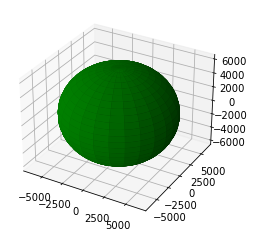

In [125]:
%matplotlib notebook
%matplotlib widget
plotEarth()
fig

In [113]:
%matplotlib inline
# matplotlib.use('Agg')
# -*- coding: utf-8 -*-
import numpy as np
from datetime import datetime, timedelta
import pytz
# import graphics
import urllib

pdt = pytz.timezone('US/Pacific')

sqrt = np.sqrt
pi = np.pi
sin = np.sin
cos = np.cos

# Standard Gravitational parameter in km^3 / s^2 of Earth
GM = 398600.4418

def splitElem(tle):
    "Splits a two line element set into title and it's two lines with stripped lines"
    return map(lambda x: x.strip(), tle.split('\n'))

def checkValid(tle):
    "Checks with checksum to make sure element is valid"
    title, line1, line2 =  splitElem(tle)

    return line1[0] == '1' and line2[0] == '2' and \
           line1[2:7] == line2[2:7] and \
           int(line1[-1]) == doChecksum(line1) and int(line2[-1]) == doChecksum(line2)

def stringScientificNotationToFloat(sn):
    "Specific format is 5 digits, a + or -, and 1 digit, ex: 01234-5 which is 0.01234e-5"
    return 0.00001*float(sn[5]) * 10**int(sn[6:])

def eccentricAnomalyFromMean(mean_anomaly, eccentricity, initValue,
                             maxIter=500, maxAccuracy = 0.0001):
    """Approximates Eccentric Anomaly from Mean Anomaly
       All input and outputs are in radians"""
    mean_anomaly = mean_anomaly
    e0 = initValue
    for x in range(maxIter):
        e1 = e0 - (e0 - eccentricity * sin(e0) - mean_anomaly) / (1.0 - eccentricity * cos(e0))
        if (abs(e1-e0) < maxAccuracy):
            break
    return e1

def pretty_print(tle, printInfo = True, labels = True):
    "Returns commented information on a two line element"
    title, line1, line2 =  splitElem(tle)
    if not checkValid(tle):
        print( "Invalid element.")
        return

    satellite_number                                        = int(line1[2:7])
    classification                                          = line1[7:8]
    international_designator_year                           = int(line1[9:11])
    international_designator_launch_number                  = int(line1[11:14])
    international_designator_piece_of_launch                = line1[14:17]
    epoch_year                                              = int(line1[18:20])
    epoch                                                   = float(line1[20:32])
    first_time_derivative_of_the_mean_motion_divided_by_two = float(line1[33:43])
    second_time_derivative_of_mean_motion_divided_by_six    = stringScientificNotationToFloat(line1[44:52])
    bstar_drag_term                                         = stringScientificNotationToFloat(line1[53:61])
    the_number_0                                            = float(line1[62:63])
    element_number                                          = float(line1[64:68])
    checksum1                                               = float(line1[68:69])

    satellite        = int(line2[2:7])
    inclination      = float(line2[8:16])
    right_ascension  = float(line2[17:25])
    eccentricity     = float(line2[26:33]) * 0.0000001
    argument_perigee = float(line2[34:42])
    mean_anomaly     = float(line2[43:51])
    mean_motion      = float(line2[52:63])
    revolution       = float(line2[63:68])
    checksum2        = float(line2[68:69])

    # Inferred Epoch date
    year = 2000 + epoch_year if epoch_year < 70 else 1900 + epoch_year
    epoch_date = datetime(year=year, month=1, day=1, tzinfo=pytz.utc) + timedelta(days=epoch-1) # Have to subtract one day to get correct midnight

    # Time difference of now from epoch, offset in radians
    diff = datetime.now().replace(tzinfo=pytz.utc) + timedelta(hours=8) - epoch_date # Offset for PDT
    diff_seconds = 24*60*60*diff.days + diff.seconds + 1e-6*diff.microseconds # sec
    print( "Time offset: %s" % diff)
    motion_per_sec = mean_motion * 2*pi / (24*60*60) # rad/sec
    print( "Radians per second: %g" % motion_per_sec)
    offset = diff_seconds * motion_per_sec #rad
    print( "Offset to apply: %g" % offset)
    mean_anomaly += offset * 180/pi % 360

    # Inferred period
    day_seconds = 24*60*60
    period = day_seconds * 1./mean_motion

    # Inferred semi-major axis (in km)
    semi_major_axis = ((period/(2*pi))**2 * GM)**(1./3)

    # Inferred true anomaly
    eccentric_anomaly = eccentricAnomalyFromMean(mean_anomaly * pi/180, eccentricity, mean_anomaly * pi/180)
    true_anomaly = 2*np.arctan2(sqrt(1+eccentricity) * sin(eccentric_anomaly/2.0), sqrt(1-eccentricity) * cos(eccentric_anomaly/2.0))
    # Convert to degrees
    eccentric_anomaly *= 180/pi
    true_anomaly *= 180/pi

    if (printInfo):
        print( "----------------------------------------------------------------------------------------")
        print( tle)
        print( "---")
        print( "Satellite Name                                            = %s" % title)
        print( "Satellite number                                          = %g (%s)" % (satellite_number, "Unclassified" if classification == 'U' else "Classified"))
        print( "International Designator                                  = YR: %02d, LAUNCH #%d, PIECE: %s" % (international_designator_year, international_designator_launch_number, international_designator_piece_of_launch))
        print( "Epoch Date                                                = %s  (YR:%02d DAY:%.11g)" % (epoch_date.strftime("%Y-%m-%d %H:%M:%S.%f %Z"), epoch_year, epoch))
        print( "First Time Derivative of the Mean Motion divided by two   = %g" % first_time_derivative_of_the_mean_motion_divided_by_two)
        print( "Second Time Derivative of Mean Motion divided by six      = %g" % second_time_derivative_of_mean_motion_divided_by_six)
        print( "BSTAR drag term                                           = %g" % bstar_drag_term)
        print( "The number 0                                              = %g" % the_number_0)
        print( "Element number                                            = %g" % element_number)
        print()
        print( "Inclination [Degrees]                                     = %g°" % inclination)
        print( "Right Ascension of the Ascending Node [Degrees]           = %g°" % right_ascension)
        print( "Eccentricity                                              = %g" % eccentricity)
        print( "Argument of Perigee [Degrees]                             = %g°" % argument_perigee)
        print( "Mean Anomaly [Degrees] Anomaly                            = %g°" % mean_anomaly)
        print( "Eccentric Anomaly                                         = %g°" % eccentric_anomaly)
        print( "True Anomaly                                              = %g°" % true_anomaly)
        print( "Mean Motion [Revs per day] Motion                         = %g" % mean_motion)
        print( "Period                                                    = %s" % timedelta(seconds=period))
        print( "Revolution number at epoch [Revs]                         = %g" % revolution)

        print()
        print( "semi_major_axis = %gkm" % semi_major_axis)
        print( "eccentricity    = %g" % eccentricity)
        print( "inclination     = %g°" % inclination)
        print( "arg_perigee     = %g°" % argument_perigee)
        print( "right_ascension = %g°" % right_ascension)
        print( "true_anomaly    = %g°" % true_anomaly)
        print( "----------------------------------------------------------------------------------------")

    if labels:
        plotOrbit(semi_major_axis, eccentricity, inclination,
                           right_ascension, argument_perigee, true_anomaly, title)
    else:
        plotOrbit(semi_major_axis, eccentricity, inclination,
                           right_ascension, argument_perigee, true_anomaly)

def doChecksum(line):
    """The checksums for each line are calculated by adding the all numerical digits on that line, including the 
       line number. One is added to the checksum for each negative sign (-) on that line. All other non-digit 
       characters are ignored.
       @note this excludes last char for the checksum thats already there."""
    return sum(map(int, filter(lambda c: c >= '0' and c <= '9', line[:-1].replace('-','1')))) % 10

# elem1 = """ISS (ZARYA)
# 1 25544U 98067A   08264.51782528 -.00002182  00000-0 -11606-4 0  2927
# 2 25544  51.6416 247.4627 0006703 130.5360 325.0288 15.72125391563537"""

# dragon = """DRAGON CRS-2            
# 1 39115U 13010A   13062.62492353  .00008823  00000-0  14845-3 0   188
# 2 39115  51.6441 272.5899 0012056 334.2535  68.5574 15.52501943   306"""

plotEarth()

# Data from NORAD http://www.celestrak.com/NORAD/elements/
# filename = "noaa.txt" # NOAA satellites
# filename = "geo.txt" # Geostationary satellites
# filename = "gps-ops.txt" # GPS sats
# filename = "military.txt" # Some military satellites
# filename = "stations.txt" # Space stations
# filename = "visual.txt" # 100 brightest or so objects

# files = ["noaa.txt", "stations.txt", "military.txt", "gps-ops.txt"]
# files = ["stations.txt"]

names = ["stations"]

for urlname in names:
    f = urllib.request.urlopen("http://www.celestrak.com/NORAD/elements/%s.txt" % urlname)
    elem = b""
    for line in f:
#         print(elem, line)
        elem += line
        if (line[0] == '2'):
            elem = elem.strip()
            if elem.startswith("ISS"):
                pretty_print(elem, printInfo=False, labels=False)
            elem = b""

# pretty_print(elem1)
# pretty_print(dragon)

doDraw()

# EOF

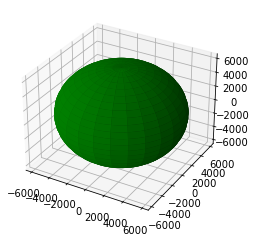

In [74]:
# line1 ='1 25544U 98067A   21014.87156498  .00001899  00000-0  42163-4 0  9993'
# line2 ='2 25544  51.6460  21.0493 0000363 230.6069 201.6701 15.49294771264830'

# satellite_number                                        = int(line1[2:7])
# classification                                          = line1[7:8]
# international_designator_year                           = int(line1[9:11])
# international_designator_launch_number                  = int(line1[11:14])
# international_designator_piece_of_launch                = line1[14:17]
# epoch_year                                              = int(line1[18:20])
# epoch                                                   = float(line1[20:32])
# first_time_derivative_of_the_mean_motion_divided_by_two = float(line1[33:43])
# second_time_derivative_of_mean_motion_divided_by_six    = stringScientificNotationToFloat(line1[44:52])
# bstar_drag_term                                         = stringScientificNotationToFloat(line1[53:61])
# the_number_0                                            = float(line1[62:63])
# element_number                                          = float(line1[64:68])
# checksum1                                               = float(line1[68:69])

# satellite        = int(line2[2:7])
# inclination      = float(line2[8:16])
# right_ascension  = float(line2[17:25])
# eccentricity     = float(line2[26:33]) * 0.0000001
# argument_perigee = float(line2[34:42])
# mean_anomaly     = float(line2[43:51])
# mean_motion      = float(line2[52:63])
# revolution       = float(line2[63:68])
# checksum2        = float(line2[68:69])

# # Inferred Epoch date
# year = 2000 + epoch_year if epoch_year < 70 else 1900 + epoch_year
# epoch_date = datetime(year=year, month=1, day=1, tzinfo=pytz.utc) + timedelta(days=epoch-1) # Have to subtract one day to get correct midnight

# # Time difference of now from epoch, offset in radians
# diff = datetime.now().replace(tzinfo=pytz.utc) + timedelta(hours=8) - epoch_date # Offset for PDT
# diff_seconds = 24*60*60*diff.days + diff.seconds + 1e-6*diff.microseconds # sec
# print( "Time offset: %s" % diff)
# motion_per_sec = mean_motion * 2*pi / (24*60*60) # rad/sec
# print( "Radians per second: %g" % motion_per_sec)
# offset = diff_seconds * motion_per_sec #rad
# print( "Offset to apply: %g" % offset)
# mean_anomaly += offset * 180/pi % 360

# # Inferred period
# day_seconds = 24*60*60
# period = day_seconds * 1./mean_motion

# # Inferred semi-major axis (in km)
# semi_major_axis = ((period/(2*pi))**2 * GM)**(1./3)

# # Inferred true anomaly
# eccentric_anomaly = eccentricAnomalyFromMean(mean_anomaly * pi/180, eccentricity, mean_anomaly * pi/180)
# true_anomaly = 2*np.arctan2(sqrt(1+eccentricity) * sin(eccentric_anomaly/2.0), sqrt(1-eccentricity) * cos(eccentric_anomaly/2.0))
# # Convert to degrees
# eccentric_anomaly *= 180/pi
# true_anomaly *= 180/pi
# plotOrbit(semi_major_axis, eccentricity=0, inclination=0, 
#               right_ascension=0, argument_perigee=0, true_anomaly=0, label=None)

Time offset: 11:58:09.465087
Radians per second: 0.00112668
Offset to apply: 48.548
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[[<zip object at 0x7fd4e1188d80>]]


ValueError: shapes (3,3) and (1,1) not aligned: 3 (dim 1) != 1 (dim 0)

In [ ]:
plt.ion()